In [1]:
git --version

NameError: name 'git' is not defined

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [3]:
df=pd.read_csv("bank.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Basic EDA for visualizing intial dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

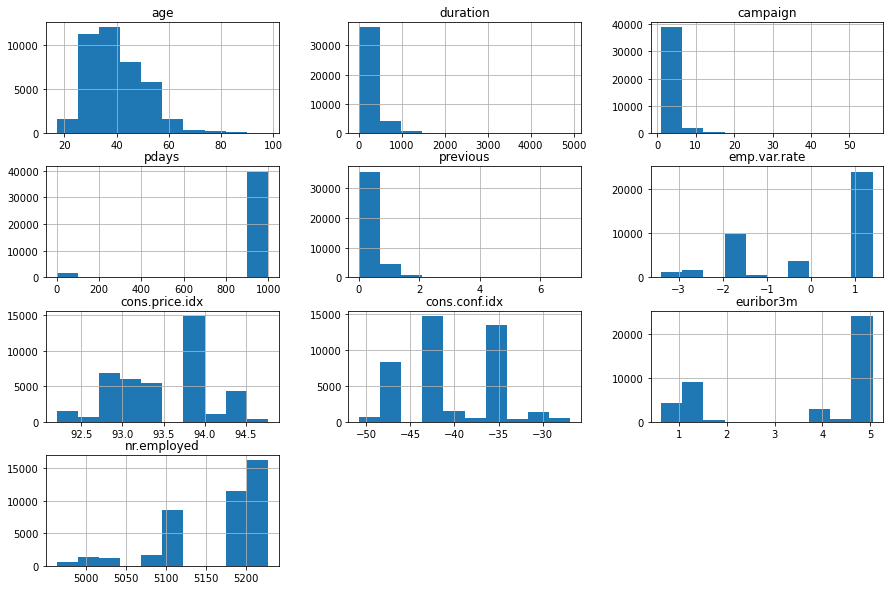

In [12]:
# plt.figure(figsize=(10,15))
df.hist(figsize=(15,10))

<AxesSubplot:xlabel='education', ylabel='age'>

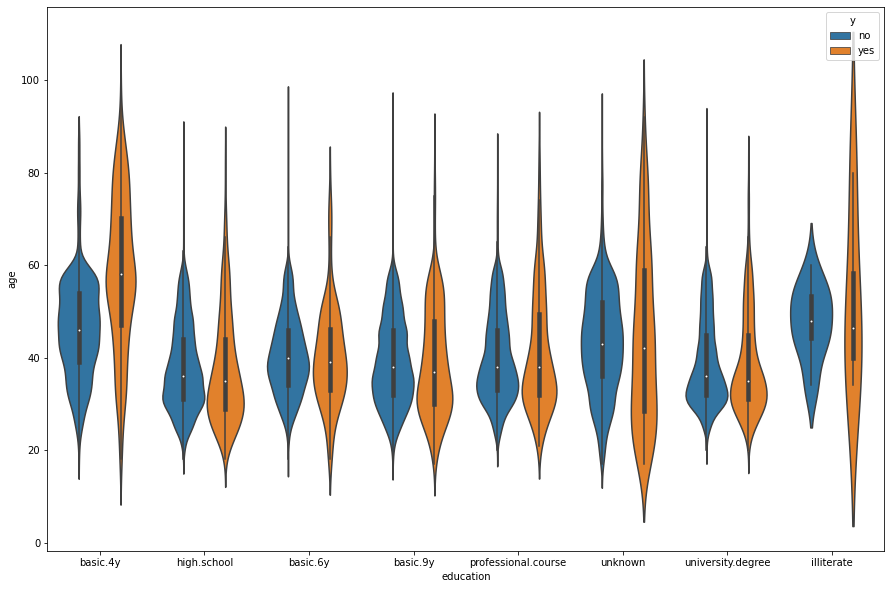

In [18]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df,hue="y",y="age", x='education')

In [20]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Converting all categorical features in numerical ones

#### Part of Feature Engineering used for encoding

#### Encoding Tehniques
- one hot encoder
- ordinal encoder
- label encoder(used here),etc

In [21]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       'poutcome', 'y']

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in cols:
    df[col] = label.fit_transform(df[col])

### Seperating the class label and other features

In [23]:
X=df.iloc[:,:-1]
# Independent feature

In [24]:
Y=df.iloc[:,-1]
# Class feature(Dependent feature)

# Balancing
###  *Only done in case of classifiaction*

### Random Sampling Techniques
- SMOTE(oversampling: increases minority class no by adding synthetic values)(used here)
- ENN(undersampling: reducing the no of values based on similarity in rows)
1.ENN can be used for reducing data entries (vertical) which are very much similar to each other

2.ENN can used in almost every dataset


In [12]:
Y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smoke=SMOTE(sampling_strategy=0.3)

In [15]:
X,Y=smoke.fit_resample(X,Y)

In [16]:
Y.value_counts()

0    36548
1    10964
Name: y, dtype: int64

# Treating missing values and outliers

In [17]:
df.isnull().sum()
# No missing values found

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Outliers
#### Detection method
- Box Plot(IQR)
- Z-Score
####  Outlier removal
- Direct Removal of entry
- Remove all outlier values and treat as missing values


#### IQ - Why median is preferred in replacing outliers?
- Beacuse means and mode are affected by outlier to a greater extent than median 

<AxesSubplot:>

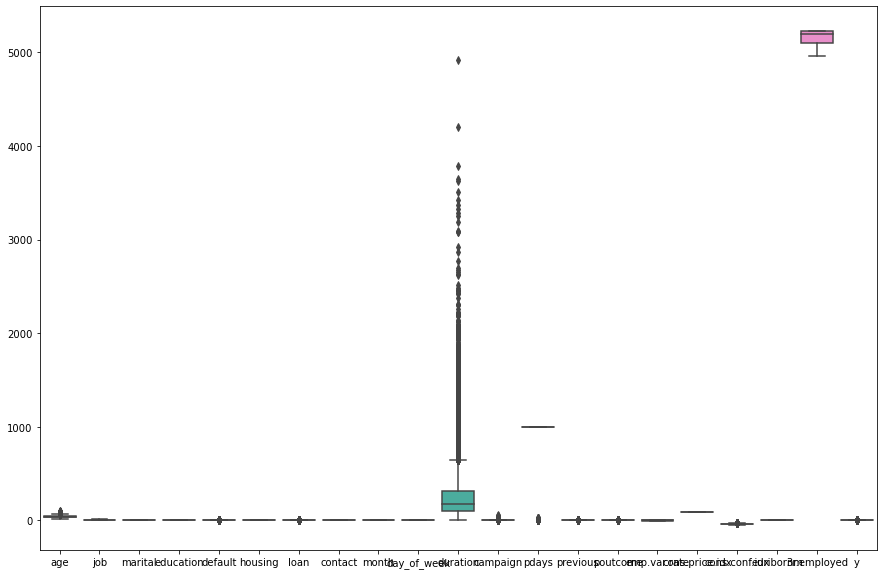

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
# Checking for outlier

In [36]:
df.drop(['duration'],axis=1,inplace=True)
# removed a feature due to many outliers

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

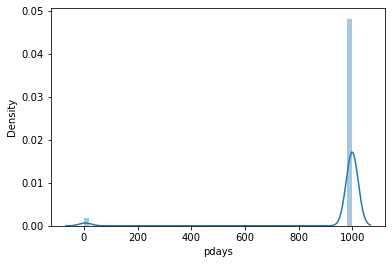

In [21]:
sns.distplot(df['pdays'],kde=True)

In [22]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Feature Selection
- link for futher techniques
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

#### Additional data reductional techniques(used for reducing features)
- PCA
- LDA
- Auto Encoder(USed majorly in case of images and videos)

In [24]:
from sklearn.feature_selection import mutual_info_classif

In [25]:
imp=mutual_info_classif(X,Y)

In [26]:
imp

array([0.01612172, 0.02729937, 0.00502683, 0.0320345 , 0.02367824,
       0.02899067, 0.01078856, 0.03762846, 0.0543279 , 0.00516679,
       0.13269308, 0.01464226, 0.05533614, 0.01830547, 0.05474147,
       0.11653263, 0.19224399, 0.19814699, 0.26049229, 0.12789147])

In [27]:
data = pd.Series(imp, X.columns)

<AxesSubplot:>

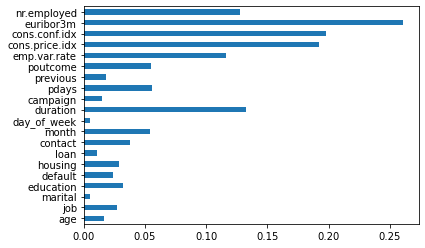

In [28]:
data.plot(kind = 'barh')

In [29]:
data.index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [30]:
lst=[]
for i in data.index:
    if data[i] < .01:
        lst.append(i)

In [31]:
lst

['marital', 'day_of_week']

### Remove the colums whole information gain is less than 0.1


In [32]:
X.drop(lst,axis=1,inplace=True)

In [33]:
X.head()

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,0,1,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,3,1,0,0,1,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,3,0,2,0,1,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,1,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,3,0,0,2,1,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


### Checking correlation between features

<AxesSubplot:>

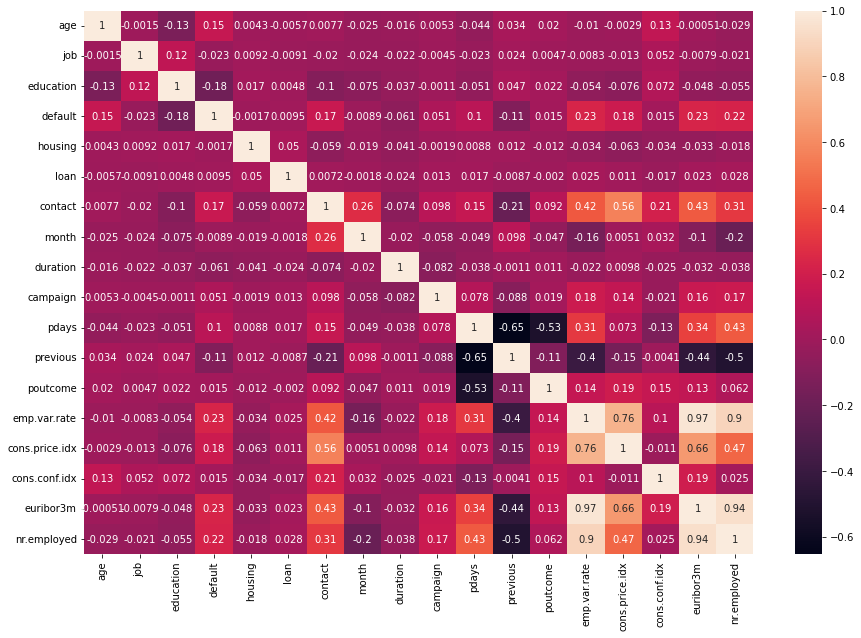

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

   ### If correlation if greater than 0.9, we may drop those features because they can make data baised

In [35]:
cm=X.corr().abs()

In [36]:
cm

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001511,0.134917,0.150563,0.004260,0.005686,0.007723,0.024612,0.016315,0.005272,0.043582,0.033693,0.020309,0.010014,0.002892,0.132574,0.000506,0.028938
job,0.001511,1.000000,0.124680,0.023428,0.009183,0.009082,0.019749,0.023766,0.021811,0.004522,0.023498,0.023504,0.004657,0.008288,0.012655,0.051663,0.007858,0.020884
education,0.134917,0.124680,1.000000,0.177778,0.017384,0.004824,0.101899,0.074710,0.037273,0.001063,0.050842,0.047076,0.021795,0.054284,0.075791,0.072300,0.047917,0.055199
default,0.150563,0.023428,0.177778,1.000000,0.001661,0.009475,0.165347,0.008896,0.060613,0.051155,0.103195,0.108438,0.015325,0.230879,0.175611,0.015089,0.225326,0.219645
housing,0.004260,0.009183,0.017384,0.001661,1.000000,0.049562,0.058922,0.018597,0.040623,0.001948,0.008786,0.011713,0.011896,0.034379,0.063288,0.034443,0.033255,0.017559
loan,0.005686,0.009082,0.004824,0.009475,0.049562,1.000000,0.007172,0.001819,0.023973,0.013381,0.017333,0.008746,0.002023,0.025328,0.011299,0.017140,0.023370,0.028357
contact,0.007723,0.019749,0.101899,0.165347,0.058922,0.007172,1.000000,0.264848,0.073716,0.097543,0.151660,0.213166,0.091677,0.419275,0.561059,0.211852,0.429875,0.312799
month,0.024612,0.023766,0.074710,0.008896,0.018597,0.001819,0.264848,1.000000,0.020186,0.057527,0.048763,0.098290,0.047256,0.155378,0.005083,0.032327,0.100279,0.202292
duration,0.016315,0.021811,0.037273,0.060613,0.040623,0.023973,0.073716,0.020186,1.000000,0.081640,0.038376,0.001104,0.010702,0.021526,0.009781,0.025188,0.031548,0.037817
campaign,0.005272,0.004522,0.001063,0.051155,0.001948,0.013381,0.097543,0.057527,0.081640,1.000000,0.078295,0.088463,0.019346,0.176445,0.136438,0.021487,0.162609,0.170411


In [37]:
upper=cm.where(np.triu(np.ones(cm.shape),k=1).astype(np.bool))
to_drop=[c for c in upper.columns if any(upper[c]>0.9)]
X.drop(to_drop, axis=1, inplace=True)


C:\Users\Awesome PC\AppData\Local\Temp\ipykernel_8068\1153203536.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper=cm.where(np.triu(np.ones(cm.shape),k=1).astype(np.bool))


In [38]:
X.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')

### Checking corelation of features with class

In [27]:
# Joining two dataframes
AA=pd.concat([X,Y],axis=1)

<AxesSubplot:>

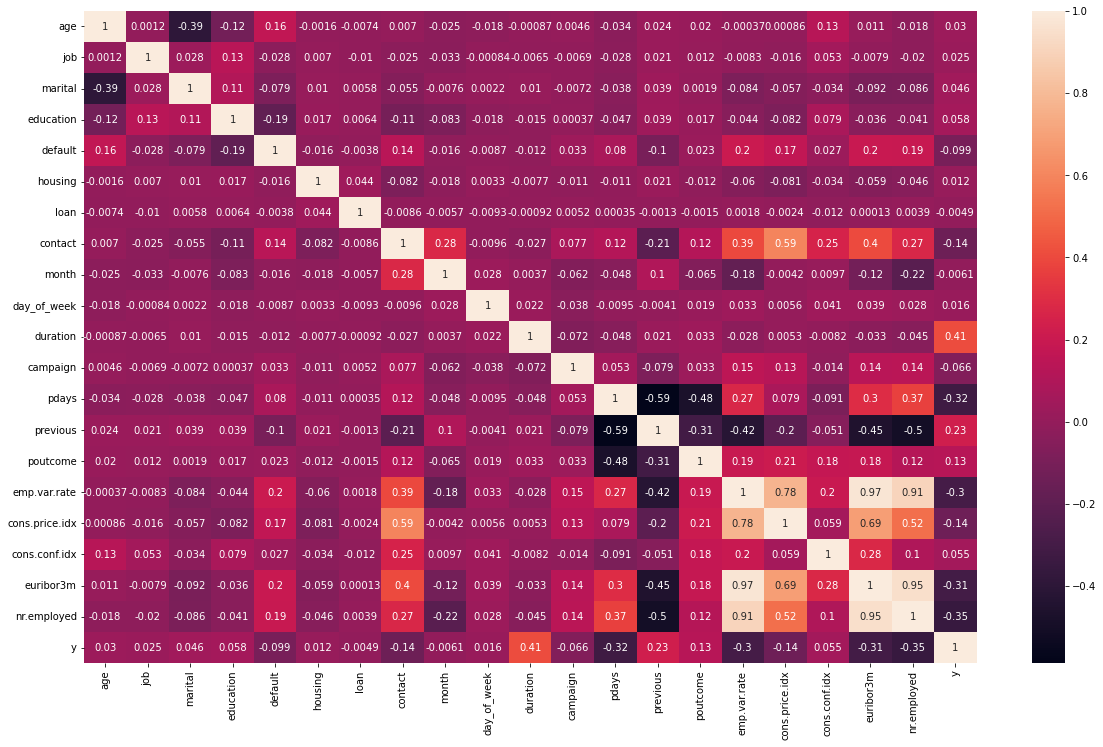

In [35]:
plt.figure(figsize=(20,12))
sns.heatmap(AA.corr(),annot=True)

# Feature Scalling
- Santdarization
- Mid-Max Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XX = ss.fit_transform(X)

In [40]:
XX

array([[ 1.49297971, -0.19526978, -1.78682294, ...,  0.72908344,
         0.75532067,  0.83301748],
       [ 1.58624126,  0.93663505, -0.35640118, ...,  0.72908344,
         0.75532067,  0.83301748],
       [-0.27898966,  0.93663505, -0.35640118, ...,  0.72908344,
         0.75532067,  0.83301748],
       ...,
       [-0.74529739, -0.47824599,  1.07402058, ...,  0.91210685,
         0.97928632,  0.10542591],
       [ 1.21319507, -1.04419841, -0.35640118, ..., -1.9783349 ,
        -1.42984476,  2.05821016],
       [-0.83855894,  1.21961125,  0.59721333, ..., -0.97913504,
         0.96218525,  0.08878822]])

## Modelling Starts From Here

### Training-Testing set split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,Y,test_size=0.2)

### Dataset splited for both x (feaures) in train and test  and y (class) in train and test in 80:20

# Applying Classification Models

## 1. Logestic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
# this is just for training

LogisticRegression()

## Checking fitting of model

In [43]:
# Saving predictions of training and testing dataset
prd_train= lr.predict(X_train)
prd_test= lr.predict(X_test)

In [44]:
#Checking accuracy of training and testing dataset to verify best fit of our model
skl.metrics.accuracy_score(Y_train,prd_train)
skl.metrics.accuracy_score(Y_test,prd_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.8832907995474756
0.8738293170577712


# Hyper Parameter Tuning
- Improving your model
- Tackel the overfitting and underfitting of the model

In [45]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [48]:
clf = GridSearchCV(lr,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  

In [49]:
clf.fit(X_train,Y_train)

C:\Users\Awesome PC\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Awesome PC\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Awesome PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Awesome PC\AppData\Roaming\Python\Python39\site-pack

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [50]:
clf.best_params_


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
clf.best_score_

0.882922527312757

In [52]:
# Our model is right fit`

## 2. Decision Tree

In [53]:
dt= skl.tree.DecisionTreeClassifier()

In [54]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [55]:
prd_train= dt.predict(X_train)
prd_test= dt.predict(X_test)

In [56]:
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

1.0
0.8928759339156056


In [57]:
# Our model is overfit

# 3. Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [59]:
prd_train= nb.predict(X_train)
prd_test= nb.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.8168065458180958
0.8120593496790487


In [60]:
# Our model is overfit


# 4.KNN

In [61]:
knn= skl.neighbors.KNeighborsClassifier(13)

In [62]:
knn.fit(X_train,Y_train)
prd_train= knn.predict(X_train)
prd_test= knn.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.9076797600568286
0.8902451857308219


In [63]:
# Our Model is slightly overfit

# 5.SVM

In [64]:
#sm= skl.svm.SVC()

In [65]:
# sm.fit(X_train,Y_train)
# prd_train= sm.predict(X_train)
# prd_test= sm.predict(X_test)
# print(skl.metrics.accuracy_score(Y_train,prd_train))
# print(skl.metrics.accuracy_score(Y_test,prd))

# 6. Random Forest

In [66]:
rf = skl.ensemble.RandomForestClassifier()

In [67]:
rf.fit(X_train,Y_train)
prd_train= rf.predict(X_train)
prd_test= rf.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

1.0
0.9221298537304009


# 7. XG Boost

In [68]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train,Y_train)
prd_train= xb.predict(X_train)
prd_test= xb.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.9519850561709069
0.9155003683047459


# Model Evalution Methods
- Confusion Matrix
- Accuracy Score
- Classification Report
- ROC AUC curve

In [69]:
skl.metrics.confusion_matrix(Y_test, prd_test)
#confusion matrix

array([[6938,  342],
       [ 461, 1762]], dtype=int64)

In [70]:
print(skl.metrics.classification_report(Y_test,prd_test))
# Classification Report

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7280
           1       0.84      0.79      0.81      2223

    accuracy                           0.92      9503
   macro avg       0.89      0.87      0.88      9503
weighted avg       0.91      0.92      0.91      9503

